Dataset:
    Student  Marks
0     Amit     78
1     Riya     56
2    Sohan     90
3     Neha     45
4    Rahul     66
5   Anjali     56
6     Ravi     90
7    Priya     66
8    Rohan     78
9    Meena     45
10   Rahul     56

  Statistical Analysis:
Mean: 66.0
Median: 66.0
Mode: 56
Standard Deviation: 16.192590898309017
Variance: 262.2


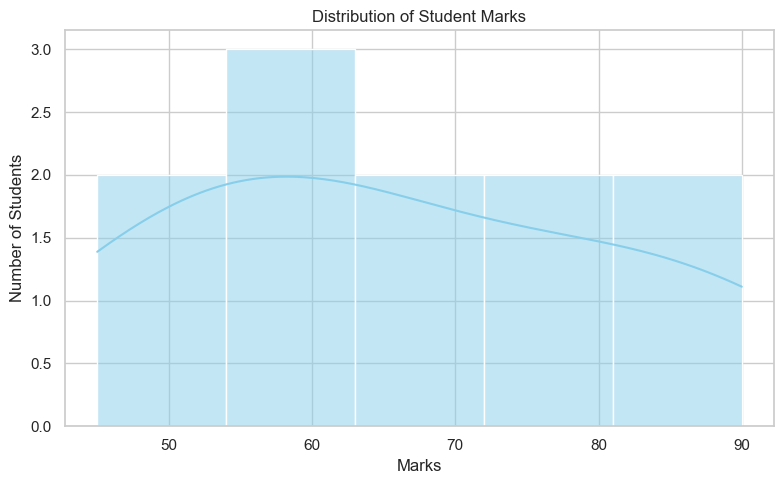

In [12]:
# Student Marks Analysis using Statistics

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statistics import mode

# Load dataset
df = pd.read_csv("marks.csv")

# Display the data
print("Dataset:\n", df)

# Basic statistics
mean_marks = df["Marks"].mean()
median_marks = df["Marks"].median()
mode_marks = mode(df["Marks"])
std_dev = df["Marks"].std()
variance = df["Marks"].var()

# Print statistical values
print(f"\n  Statistical Analysis:")
print(f"Mean: {mean_marks}")
print(f"Median: {median_marks}")
print(f"Mode: {mode_marks}")
print(f"Standard Deviation: {std_dev}")
print(f"Variance: {variance}")

# Data visualization

# Set theme
sns.set(style="whitegrid")

# Histogram
plt.figure(figsize=(8, 5))
sns.histplot(df["Marks"], bins=5, kde=True, color='skyblue')
plt.title("Distribution of Student Marks")
plt.xlabel("Marks")
plt.ylabel("Number of Students")
plt.tight_layout()
plt.show()


🧹 Checking for missing values:
 Student    0
Maths      0
Science    0
English    0
SST        0
dtype: int64
 All marks are valid and in the range 0–100.

 Descriptive Statistics:

Subject: Maths
  Mean: 67.00
  Median: 66.0
  Mode: 78
  Standard Deviation: 16.71
  Variance: 279.11

Subject: Science
  Mean: 70.00
  Median: 68.5
  Mode: 85
  Standard Deviation: 15.45
  Variance: 238.67

Subject: English
  Mean: 69.00
  Median: 67.0
  Mode: 67
  Standard Deviation: 13.98
  Variance: 195.33

Subject: SST
  Mean: 69.00
  Median: 67.0
  Mode: 74
  Standard Deviation: 15.09
  Variance: 227.78

 Subject with highest average marks: Science
 Subject with lowest average marks: Maths

 Student-wise Performance:
   Student  Total  Average        Performance
0    Amit    304    76.00               Good
1    Riya    241    60.25            Average
2   Sohan    363    90.75          Excellent
3    Neha    196    49.00  Needs Improvement
4   Rahul    276    69.00            Average
5  Anjali    243  

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10332\674979391.py:14: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  if df.drop(columns='Student').applymap(lambda x: x < 0 or x > 100).any().any():
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10332\674979391.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Student", y="Total", data=df, palette="Blues_d")


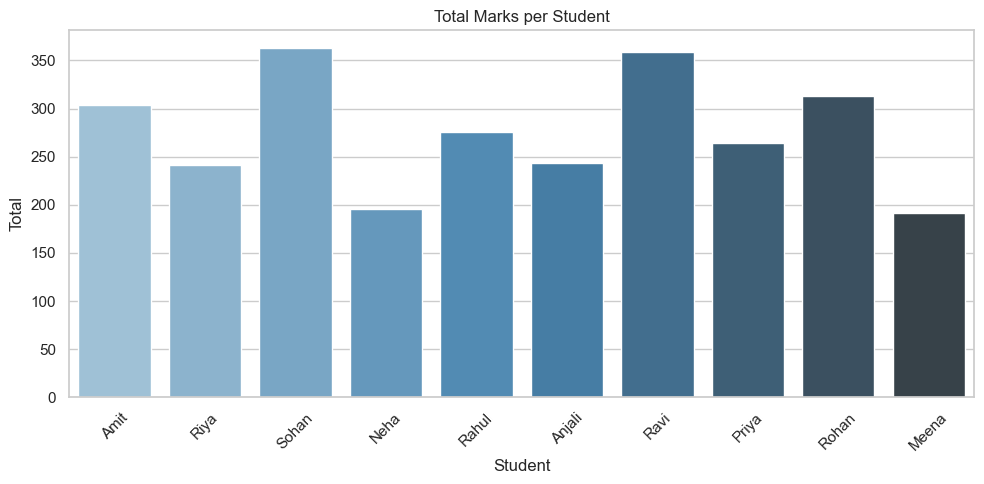

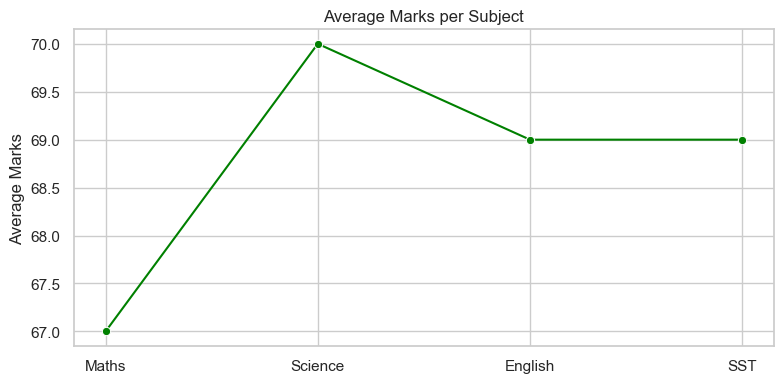

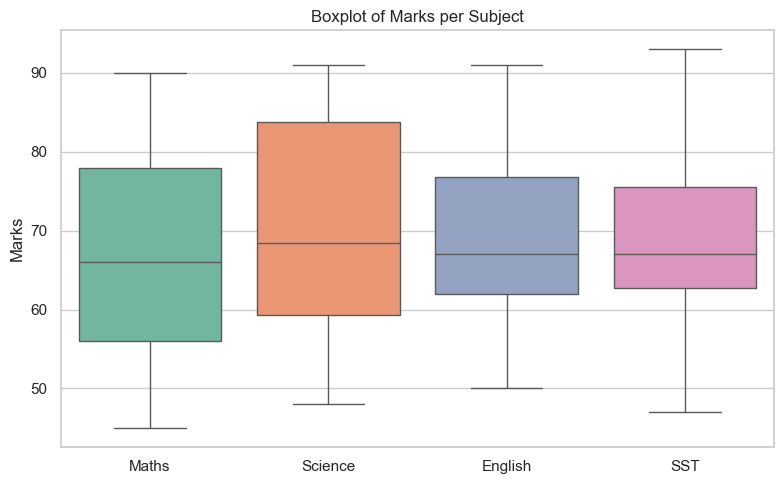

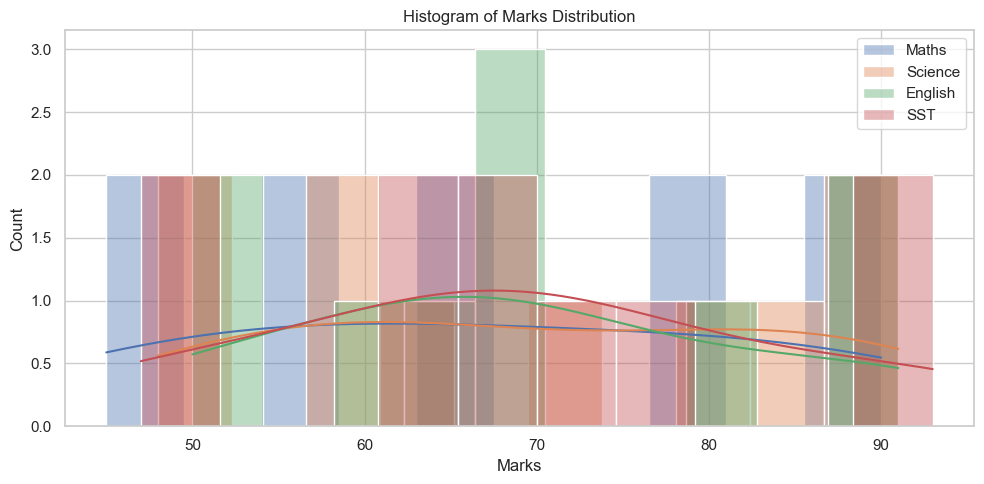

In [16]:
# Student Performance Analysis by Subject using Statistics & Visualization

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statistics import mode

# Load the dataset
df = pd.read_csv("student_scores.csv")

# 1. Data Cleaning
print("🧹 Checking for missing values:\n", df.isnull().sum())
if df.drop(columns='Student').applymap(lambda x: x < 0 or x > 100).any().any():
    print(" Invalid marks found (not in range 0–100).")
else:
    print(" All marks are valid and in the range 0–100.")

# 2. Descriptive Statistics
subjects = ['Maths', 'Science', 'English', 'SST']
print("\n Descriptive Statistics:")

for subject in subjects:
    print(f"\nSubject: {subject}")
    print(f"  Mean: {df[subject].mean():.2f}")
    print(f"  Median: {df[subject].median()}")
    print(f"  Mode: {mode(df[subject])}")
    print(f"  Standard Deviation: {df[subject].std():.2f}")
    print(f"  Variance: {df[subject].var():.2f}")

# Most and least scoring subject (by average)
avg_scores = df[subjects].mean()
print("\n Subject with highest average marks:", avg_scores.idxmax())
print(" Subject with lowest average marks:", avg_scores.idxmin())

# 3. Student-Wise Analysis
df["Total"] = df[subjects].sum(axis=1)
df["Average"] = df["Total"] / len(subjects)

def categorize(avg):
    if avg >= 85:
        return "Excellent"
    elif avg >= 70:
        return "Good"
    elif avg >= 50:
        return "Average"
    else:
        return "Needs Improvement"

df["Performance"] = df["Average"].apply(categorize)
print("\n Student-wise Performance:\n", df[["Student", "Total", "Average", "Performance"]])

# 4. Subject-wise Topper
print("\n Subject-wise Toppers:")
for subject in subjects:
    max_score = df[subject].max()
    topper = df[df[subject] == max_score]["Student"].values
    print(f"{subject}: {', '.join(topper)} ({max_score} marks)")

# 5. Visualization
sns.set(style="whitegrid")

# Bar Chart: Total marks of each student
plt.figure(figsize=(10, 5))
sns.barplot(x="Student", y="Total", data=df, palette="Blues_d")
plt.title("Total Marks per Student")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Line Chart: Subject-wise average marks
plt.figure(figsize=(8, 4))
sns.lineplot(x=subjects, y=avg_scores.values, marker='o', color="green")
plt.title("Average Marks per Subject")
plt.ylabel("Average Marks")
plt.tight_layout()
plt.show()

# Boxplot: Spread of marks per subject
plt.figure(figsize=(8, 5))
sns.boxplot(data=df[subjects], palette="Set2")
plt.title("Boxplot of Marks per Subject")
plt.ylabel("Marks")
plt.tight_layout()
plt.show()

# Histogram: Distribution of all subject marks
plt.figure(figsize=(10, 5))
for subject in subjects:
    sns.histplot(df[subject], kde=True, label=subject, bins=10, alpha=0.4)
plt.title("Histogram of Marks Distribution")
plt.xlabel("Marks")
plt.legend()
plt.tight_layout()
plt.show()
